In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('dataset4.csv')
df.drop('id',axis=1,inplace=True)
df.drop('num',axis=1,inplace=True)
df2 = df.head(6)
print(df2.head(6))

   age     sex    dataset               cp  trestbps   chol    fbs  \
0   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   41  Female  Cleveland  atypical angina     130.0  204.0  False   
5   56    Male  Cleveland  atypical angina     120.0  236.0  False   

          restecg  thalch  exang  oldpeak        slope   ca               thal  
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0       fixed defect  
1  lv hypertrophy   108.0   True      1.5         flat  3.0             normal  
2  lv hypertrophy   129.0   True      2.6         flat  2.0  reversable defect  
3          normal   187.0  False      3.5  downsloping  0.0             normal  
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0             normal  
5          normal   178

In [17]:
# separate columns
numeric_cols = df2.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df2.select_dtypes(include=['object', 'bool']).columns
print(numeric_cols,'\n',categorical_cols)

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca'], dtype='object') 
 Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')


In [18]:
df2[numeric_cols] = df2[numeric_cols].fillna(df2[numeric_cols].mean())
df2[categorical_cols] = df2[categorical_cols].fillna(df2[categorical_cols].mode().iloc[0])


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19748\2080436676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[numeric_cols] = df2[numeric_cols].fillna(df2[numeric_cols].mean())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19748\2080436676.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[categorical_cols] = df2[categorical_cols].fillna(df2[categorical_cols].mode().iloc[0])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19748\2080436676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a

In [19]:
categorical_encoded = pd.get_dummies(df2[categorical_cols])

In [20]:
# Combine processed data
df2_processed = pd.concat([df2[numeric_cols], categorical_encoded], axis=1)

In [21]:
df2_processed.head(6)

,age,trestbps,chol,thalch,oldpeak,ca,fbs,exang,sex_Female,sex_Male,...,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145.0,233.0,150.0,2.3,0.0,True,False,False,True,...,False,True,True,False,True,False,False,True,False,False
1,67,160.0,286.0,108.0,1.5,3.0,False,True,False,True,...,False,False,True,False,False,True,False,False,True,False
2,67,120.0,229.0,129.0,2.6,2.0,False,True,False,True,...,False,False,True,False,False,True,False,False,False,True
3,37,130.0,250.0,187.0,3.5,0.0,False,False,False,True,...,True,False,False,True,True,False,False,False,True,False
4,41,130.0,204.0,172.0,1.4,0.0,False,False,True,False,...,False,False,True,False,False,False,True,False,True,False
5,56,120.0,236.0,178.0,0.8,0.0,False,False,False,True,...,False,False,False,True,False,False,True,False,True,False


In [22]:
# Distance functions

def euclidean(x, y):
    total = 0
    for i in range(len(x)):
        total += (float(x[i]) - float(y[i])) ** 2
    return total ** 0.5

def manhattan(x, y):
    total = 0
    for i in range(len(x)):
        total += abs(float(x[i]) - float(y[i]))
    return total

def minkowski(x, y, p=3):
    total = 0
    for i in range(len(x)):
        total += abs(float(x[i]) - float(y[i])) ** p
    return total ** (1 / p)

def supremum(x, y):
    max_val = 0
    for i in range(len(x)):
        diff = abs(float(x[i]) - float(y[i]))
        if diff > max_val:
            max_val = diff
    return max_val

def jaccard(x, y):
    intersection = 0
    union = 0
    for i in range(len(x)):
        x_val = bool(x[i])
        y_val = bool(y[i])
        intersection += x_val and y_val
        union += x_val or y_val
    return round(intersection / union, 4) if union != 0 else 0

def cosine(x, y):
    dot_product = 0
    norm_x = 0
    norm_y = 0
    for i in range(len(x)):
        xi = float(x[i])
        yi = float(y[i])
        dot_product += xi * yi
        norm_x += xi ** 2
        norm_y += yi ** 2
    norm_x = norm_x ** 0.5
    norm_y = norm_y ** 0.5
    return round(dot_product / (norm_x * norm_y), 4) if norm_x and norm_y else 0

def compute_matrix(df, func):
    n = len(df)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                matrix[i, j] = func(df.iloc[i].values, df.iloc[j].values)
    return matrix


In [23]:
distances = {"Euclidean": euclidean,"Manhattan": manhattan,"Minkowski": minkowski,"Supremum": supremum,"Jaccard": jaccard,"Cosine": cosine}

In [24]:
for col in numeric_cols:
    data_subset = df2[[col]].astype(float)
    for name, func in distances.items():
        print(f"{name} Distance for {col} :")
        matrix = compute_matrix(data_subset, func)
        for row in matrix:
            print([round(value, 4) for value in row])

Euclidean Distance for age :
[np.float64(0.0), np.float64(4.0), np.float64(4.0), np.float64(26.0), np.float64(22.0), np.float64(7.0)]
[np.float64(4.0), np.float64(0.0), np.float64(0.0), np.float64(30.0), np.float64(26.0), np.float64(11.0)]
[np.float64(4.0), np.float64(0.0), np.float64(0.0), np.float64(30.0), np.float64(26.0), np.float64(11.0)]
[np.float64(26.0), np.float64(30.0), np.float64(30.0), np.float64(0.0), np.float64(4.0), np.float64(19.0)]
[np.float64(22.0), np.float64(26.0), np.float64(26.0), np.float64(4.0), np.float64(0.0), np.float64(15.0)]
[np.float64(7.0), np.float64(11.0), np.float64(11.0), np.float64(19.0), np.float64(15.0), np.float64(0.0)]
Manhattan Distance for age :
[np.float64(0.0), np.float64(4.0), np.float64(4.0), np.float64(26.0), np.float64(22.0), np.float64(7.0)]
[np.float64(4.0), np.float64(0.0), np.float64(0.0), np.float64(30.0), np.float64(26.0), np.float64(11.0)]
[np.float64(4.0), np.float64(0.0), np.float64(0.0), np.float64(30.0), np.float64(26.0), np.fl

Euclidean Matrix:
[ 0.         69.50999928 33.31801315 50.66991218 45.2085169  38.44801685]
[ 69.50999928   0.          72.76132214  96.7315874  111.4092007
  95.59021916]
[33.31801315 72.76132214  0.         69.41764905 57.13527807 50.86491915]
[50.66991218 96.7315874  69.41764905  0.         48.67658575 27.37316204]
[ 45.2085169  111.4092007   57.13527807  48.67658575   0.
  37.27411971]
[38.44801685 95.59021916 50.86491915 27.37316204 37.27411971  0.        ]


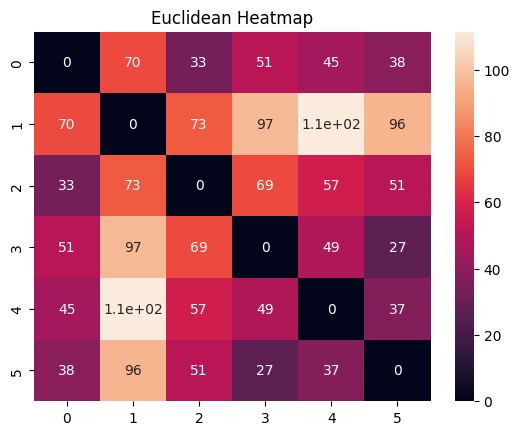

Manhattan Matrix:
[  0.  125.8  64.3 103.2  97.9  73.5]
[125.8   0.  122.1 187.  212.1 181.7]
[ 64.3 122.1   0.  130.9 116.2  79.8]
[103.2 187.  130.9   0.   75.1  58.7]
[ 97.9 212.1 116.2  75.1   0.   67.6]
[ 73.5 181.7  79.8  58.7  67.6   0. ]


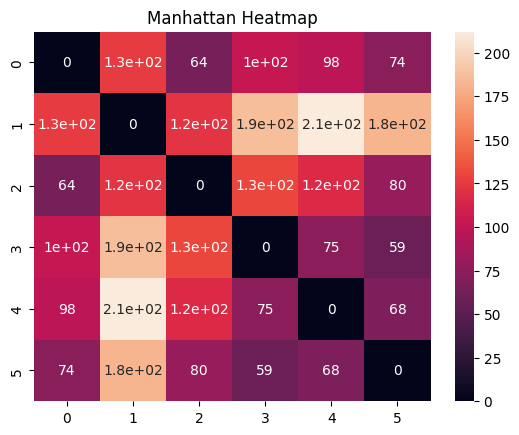

Minkowski Matrix:
[ 0.         60.95145399 29.2518793  42.45568215 36.61040668 33.60776907]
[60.95145399  0.         63.69864271 84.04877175 95.02758206 81.09764899]
[29.2518793  63.69864271  0.         61.48081266 48.4493009  49.2344494 ]
[42.45568215 84.04877175 61.48081266  0.         46.53814437 22.47696936]
[36.61040668 95.02758206 48.4493009  46.53814437  0.         33.43090116]
[33.60776907 81.09764899 49.2344494  22.47696936 33.43090116  0.        ]


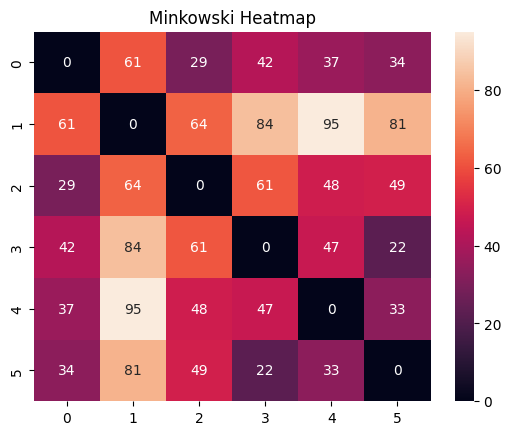

Supremum Matrix:
[ 0. 53. 25. 37. 29. 28.]
[53.  0. 57. 79. 82. 70.]
[25. 57.  0. 58. 43. 49.]
[37. 79. 58.  0. 46. 19.]
[29. 82. 43. 46.  0. 32.]
[28. 70. 49. 19. 32.  0.]


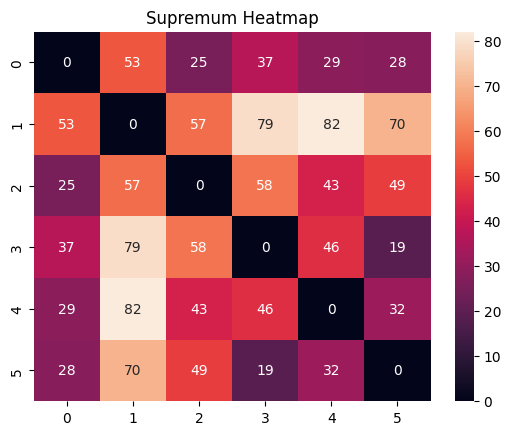

Jaccard Matrix:
[0.     0.4706 0.4706 0.5333 0.4375 0.4375]
[0.4706 0.     0.8571 0.5    0.5    0.5   ]
[0.4706 0.8571 0.     0.4118 0.4118 0.4118]
[0.5333 0.5    0.4118 0.     0.4667 0.6923]
[0.4375 0.5    0.4118 0.4667 0.     0.6923]
[0.4375 0.5    0.4118 0.6923 0.6923 0.    ]


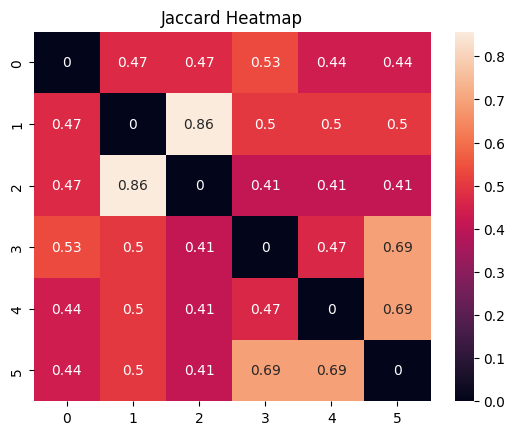

Cosine Matrix:
[0.     0.9832 0.9968 0.9902 0.9913 0.993 ]
[0.9832 0.     0.9891 0.9614 0.9539 0.9632]
[0.9968 0.9891 0.     0.9855 0.9817 0.9904]
[0.9902 0.9614 0.9855 0.     0.9965 0.9978]
[0.9913 0.9539 0.9817 0.9965 0.     0.9959]
[0.993  0.9632 0.9904 0.9978 0.9959 0.    ]


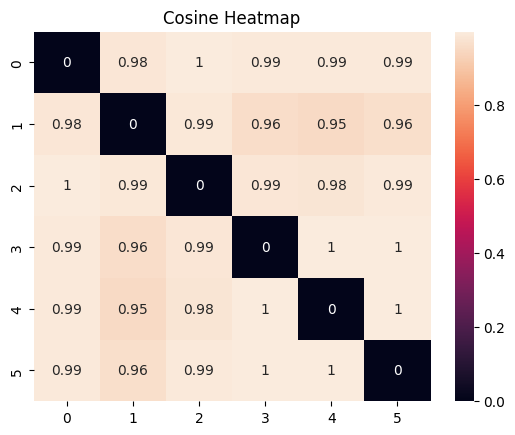

In [25]:
for name, func in distances.items():
    matrix = compute_matrix(df2_processed, func)
    print(f"{name} Matrix:")
    for row in matrix:
        print(row)
    sns.heatmap(matrix, xticklabels=df2.index, yticklabels=df2.index, annot=True)
    plt.title(f"{name} Heatmap")
    plt.show()
